In [ ]:
## ATM: At-The-Money, when S = K (the stock price is equal to the strike price)
## The following uses BSM and Put-Call Parity to calculate the options prices

In [19]:
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
## 2.2.1 Model-free upper and lower bounds for the price of a European ATM call option
## 2.2.2 Model-free upper and lower bounds for the price of a European ATM call option

# Lower bound for a call option: max(S-K,0) - max(-S+K,0)exp(-rT)
# Upper bound for a call option: max(S-K,0) + max(S-K,0)exp(-rT)

def model_free_euro_call(r, T, S, K):
    
    # Calculate model-free bounds
    lower_bound = S * (max(S-K,0) - max(-S+K,0) * math.exp(-r*T))
    upper_bound = S * (max(S-K,0) + max(S-K,0) * math.exp(-r*T))

    return lower_bound, upper_bound

# Lower bound for a put option: max(K-S,0) - max(-K+S,0)exp(-rT)
# Upper bound for a put option: max(K-S,0) + max(K-S,0)exp(-rT)

def model_free_euro_put(r, T, S, K):
    
    # Calculate model-free bounds
    lower_bound = S * (max(K-S,0) - max(-K+S,0) * math.exp(-r*T))
    upper_bound = S * (max(K-S,0) + max(K-S,0) * math.exp(-r*T))
    
    return lower_bound, upper_bound

In [10]:
lb, ub = model_free_euro_call(0.01,1,99,100)
print("lower",lb)
print("upper",ub)

lower -98.01493354116764
upper 0.0


In [14]:
## 2.2.3 Model-free upper and lower bounds for the price of an American ATM put option 
# Option parameters
S = 100   # Stock price
r = 0.05  # Risk-free interest rate
T = 1     # Time to expiration
sigma = 0.2   # Volatility
K = 100   # Strike price

# Set up the grid
n = 500   # Number of time steps
m = 500   # Number of stock price steps
dt = T/n  # Time step
ds = 2*S/m   # Stock price step
grid = np.zeros((n+1,m+1))

# Initialize the grid at expiration
for j in range(m+1):
    grid[n][j] = max(K-j*ds,0)

# Calculate the grid at earlier times
for i in range(n-1,-1,-1):
    for j in range(1,m):
        d1 = (np.log(S-j*ds/K) + (r + 0.5*sigma**2)*(T-i*dt)) / (sigma*np.sqrt((T-i*dt)))
        d2 = d1 - sigma*np.sqrt((T-i*dt))
        call_price = S*norm.cdf(d1) - K*np.exp(-r*(T-i*dt))*norm.cdf(d2)
        put_price = call_price - S + K*np.exp(-r*(T-i*dt))
        early_exercise_value = K - j*ds
        grid[i][j] = max(put_price, early_exercise_value)
    grid[i][0] = K
    grid[i][m] = 0

# Calculate the model-free upper and lower bounds
put_upper = S - grid[0][1]
put_lower = max(K-S, S-grid[0][m])

# Print the results
print("Upper bound of put price:", put_upper)
print("Lower bound of put price:", put_lower)


Upper bound of put price: 0.4000000000000057
Lower bound of put price: 100.0


In [ ]:
## the above was extremely confusing, idk how to do it :( 

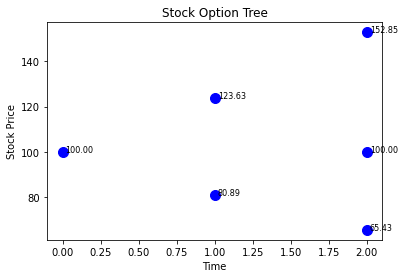

[[0.0], [0.0, 0.0], [47.84651603231782, 0.0, 0.0]]
[[0.0], [0.0, 0.0], [47.84651603231782, 0, 0.0]]
[[0.0], [0.0, 0.0], [47.84651603231782, 0, 0]]
European Call Price: 11.67


In [20]:
## 2.2.4 Compute the price of an ATM call option using a binomial model 

class EuropeanOption:
    def __init__(self, K, S0, T, r, sigma, N):
        self.dt = T/N
        self.K = K
        self.S0 = S0
        self.T = T
        self.r = r
        self.sigma = sigma
        self.N = N
        self.R = np.exp(r * self.dt)

    def __int_prms__(self):
        self.u = math.exp(self.sigma*math.sqrt(self.dt))
        self.d = 1/self.u
        self.p = (self.R - self.d)/(self.u - self.d)
        ## (math.exp((self.r-self.q)*self.dt)-self.d)/(self.u-self.d)
        ## ((R + 1) - self.d)/(self.u - self.d)
        
#     def stocktree(self):
#         stocktree = [[0.0 for j in range(i+1)] for i in range(self.N+1)]
#         for i in range(self.N+1):
#             for j in range(i+1):
#                 stocktree[i][j] = self.S0*(self.u**(i-j))*(self.d**j)
#         return stocktree
    
    def stocktree(self):
        stocktree = [[0.0 for j in range(i+1)] for i in range(self.N+1)]
        fig, ax = plt.subplots()
        for i in range(self.N+1):
            for j in range(i+1):
                stocktree[i][j] = self.S0*(self.u**(i-j))*(self.d**j)
                ax.plot([i], [stocktree[i][j]], 'o', markersize=10, color='blue')
                plt.text(i+0.02, stocktree[i][j]+0.02, f"{stocktree[i][j]:.2f}", fontsize=8)
        #if i < self.N:
        #    ax.plot([i, i+1], [stocktree[i][j], stocktree[i+1][j]], color='gray', linestyle='-', linewidth=2)
        #    ax.plot([i, i+1], [stocktree[i][j], stocktree[i+1][j+1]], color='gray', linestyle='-', linewidth=2)
        ax.set_xlabel('Time')
        ax.set_ylabel('Stock Price')
        ax.set_title('Stock Option Tree')
        plt.show()
        return stocktree

    def option_price(self, stocktree):
        option = [[0.0 for j in range(i+1)] for i in range(self.N+1)]
        if self.is_call:
            for j in range(self.N+1):
                option[self.N][j] = max(0, stocktree[self.N][j]-self.K)
                print(option)
        else:
            for j in range(self.N+1):
                option[self.N][j] = max(0, self.K-stocktree[self.N][j])
                print(option)
        return option

    # def returntree(self, option, stocktree):
    #     for i in range(self.N-1, -1, -1):
    #         for j in range(i+1):
    #             if self.is_call:
    #                 option[i][j] = max(stocktree[i][j]-self.K, 0)
    #             else:
    #                 option[i][j] = max(self.K-stocktree[i][j], 0)
    #     return option

    def optpricetree(self, option, stocktree):
        for i in range(self.N-1, -1, -1):
            for j in range(i+1):
                if self.is_call:
                    option[i][j] = (self.p*option[i+1][j]+(1-self.p)*option[i+1][j+1])/self.R
                else:
                    option[i][j] = (self.p*option[i+1][j]+(1-self.p)*option[i+1][j+1])/self.R
        return option

    def price(self, is_call):
        self.is_call = is_call
        self.__int_prms__()
        stocktree = self.stocktree()
        option = self.option_price(stocktree)
        return self.optpricetree(option, stocktree)[0][0]

    
# Example Call - $11.67, Put - $11.55
european_call = EuropeanOption(K=105, S0=100, T=1, r=0.05, sigma=0.3, N=2)
call_price = european_call.price(is_call=True)
print(f"European Call Price: {call_price:.2f}")

In [22]:
# 2.2.5 Illustrate that the price computed by the binomial model converges to the Black-Scholes price

# Option parameters
S = 100   # Stock price
r = 0.05  # Risk-free interest rate
T = 1     # Time to expiration
sigma = 0.2   # Volatility
K = 100   # Strike price

# Calculate the Black-Scholes price
d1 = (math.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*math.sqrt(T))
d2 = d1 - sigma*math.sqrt(T)
call_price = S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)
put_price = K*math.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

print("Black-Scholes call price:", call_price)
print("Black-Scholes put price:", put_price)

Black-Scholes call price: 10.450583572185565
Black-Scholes put price: 5.573526022256971


In [16]:
# 2.2.6 In the binomial model, compute the price of an ATM European put option 

# Option parameters
S0 = 100   # Stock price
K = 100    # Strike price
r = 0.05   # Risk-free interest rate
T = 1      # Time to expiration
sigma = 0.2   # Volatility
n = 100    # Number of time steps
u = math.exp(sigma * math.sqrt(T/n))
d = 1/u
p = (math.exp(r*T/n) - d) / (u - d)

# Calculate the put price
put_price = 0
for i in range(n+1):
    put_price += math.comb(n, i) * (1-p)**i * p**(n-i) * max(0, K - K*(u**i)*(d**(n-i)))
put_price *= (p/(1+r))**n

# Print the result
print("Put price:", put_price)

Put price: 2.2381579475341724e-31


In [18]:
#2.2.7 In the binomial model, compute the price of an ATM American put option

# Option parameters
S = 100   # Stock price
r = 0.05  # Risk-free interest rate
T = 1     # Time to expiration
sigma = 0.2   # Volatility
K = 100   # Strike price

# Binomial tree parameters
N = 100   # Number of time steps
u = math.exp(sigma * math.sqrt(T/N))
d = 1/u
p = (math.exp(r*T/N) - d) / (u - d)

# Set up the grid
grid = [[0 for j in range(i+1)] for i in range(N+1)]

# Initialize the grid at expiration
for j in range(N+1):
    grid[N][j] = max(K - S * (u**(2*j-N)), 0)

# Calculate the grid at earlier times
for i in range(N-1, -1, -1):
    for j in range(i+1):
        early_exercise_value = K - S * (u**(2*j-i))
        continuation_value = math.exp(-r*T/N) * (p * grid[i+1][j+1] + (1-p) * grid[i+1][j])
        grid[i][j] = max(early_exercise_value, continuation_value)

# Calculate the option price
option_price = grid[0][0]

# Print the result
print("Price of ATM American put option:", option_price)

Price of ATM American put option: 6.082354409142486
